In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('Final.csv')
# Assuming 'data' is your DataFrame
X = data[['Age', 'Gender', 'Skin Type', 'Acne', 'Aging', 'Dark spots', 'Dryness', 'Uneven']]
y = data['Product']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some algorithms like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier model with hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


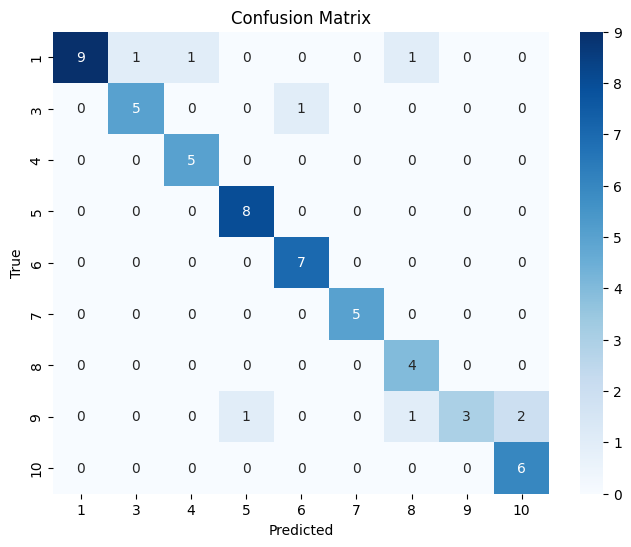

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Get the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


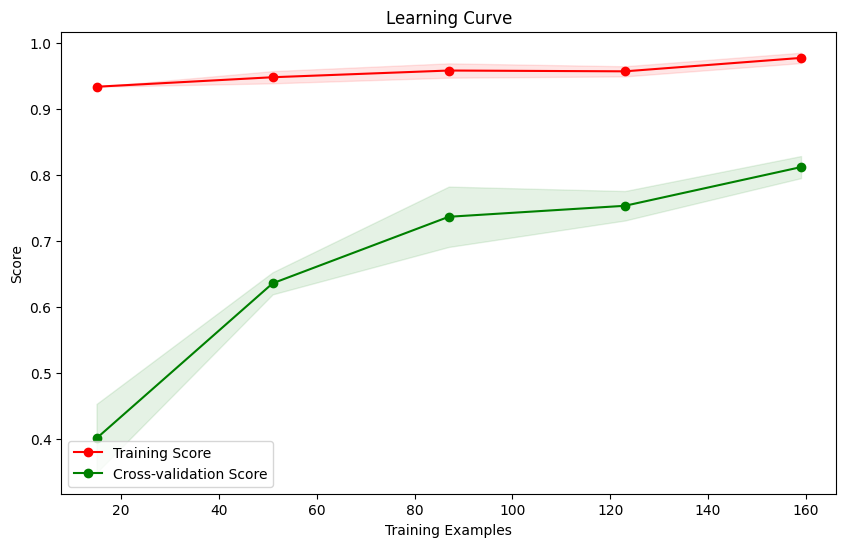

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X_train_scaled, y_train, cv=3, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.legend(loc="best")
plt.show()

In [ ]:
# Assess overfitting by comparing training and test set accuracy
train_accuracy = accuracy_score(y_train, best_rf_model.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Set Accuracy: {train_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

# Check if the model is overfitting
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
else:
    print("The model seems to be generalizing well.")


Training Set Accuracy: 0.9874476987447699
Test Set Accuracy: 0.8666666666666667
The model might be overfitting.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Final.csv')
# Assuming 'data' is your DataFrame
X = data[['Age', 'Gender', 'Skin Type', 'Acne', 'Aging', 'Dark spots', 'Dryness', 'Uneven']]
y = data['Product']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the features (important for some algorithms like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adjusting hyperparameters to reduce overfitting
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.7416666666666667
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.79      0.88        19
           3       0.77      0.91      0.83        11
           4       0.60      1.00      0.75        12
           5       0.89      0.57      0.70        14
           6       0.82      1.00      0.90        14
           7       0.56      1.00      0.72         9
           8       0.62      0.83      0.71        12
           9       1.00      0.24      0.38        17
          10       0.70      0.58      0.64        12

    accuracy                           0.74       120
   macro avg       0.77      0.77      0.72       120
weighted avg       0.80      0.74      0.72       120



In [ ]:
# Assess overfitting by comparing training and test set accuracy
train_accuracy = accuracy_score(y_train, best_rf_model.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Set Accuracy: {train_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

# Check if the model is overfitting
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
else:
    print("The model seems to be generalizing well.")


Training Set Accuracy: 0.9664429530201343
Test Set Accuracy: 0.7466666666666667
The model might be overfitting.


Desicion tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


data=pd.read_csv('Final.csv')
# Assuming 'data' is your DataFrame
X = data[['Age', 'Gender', 'Skin Type', 'Acne', 'Aging', 'Dark spots', 'Dryness', 'Uneven']]
y = data['Product']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some algorithms like Decision Trees)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)

# Evaluate the decision tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Accuracy: {accuracy_decision_tree}")

# Display classification report for more detailed evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))


Decision Tree Accuracy: 0.85
Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.75      0.86        12
           3       1.00      0.83      0.91         6
           4       0.83      1.00      0.91         5
           5       0.73      1.00      0.84         8
           6       0.86      0.86      0.86         7
           7       1.00      1.00      1.00         5
           8       0.67      1.00      0.80         4
           9       1.00      0.43      0.60         7
          10       0.75      1.00      0.86         6

    accuracy                           0.85        60
   macro avg       0.87      0.87      0.85        60
weighted avg       0.89      0.85      0.84        60



Decision Tree Accuracy: 0.85
Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.75      0.86        12
           3       1.00      0.83      0.91         6
           4       0.83      1.00      0.91         5
           5       0.73      1.00      0.84         8
           6       0.86      0.86      0.86         7
           7       1.00      1.00      1.00         5
           8       0.67      1.00      0.80         4
           9       1.00      0.43      0.60         7
          10       0.75      1.00      0.86         6

    accuracy                           0.85        60
   macro avg       0.87      0.87      0.85        60
weighted avg       0.89      0.85      0.84        60

Decision Tree Confusion Matrix:
[[9 0 1 0 0 0 2 0 0]
 [0 5 0 0 1 0 0 0 0]
 [0 0 5 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0]
 [0 0 0 1 6 0 0 0 0]
 [0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 4 0 0]
 [0 0 0 2 0 0 0 3 2]
 [0 0 0 0 0 0 0 0 6]]


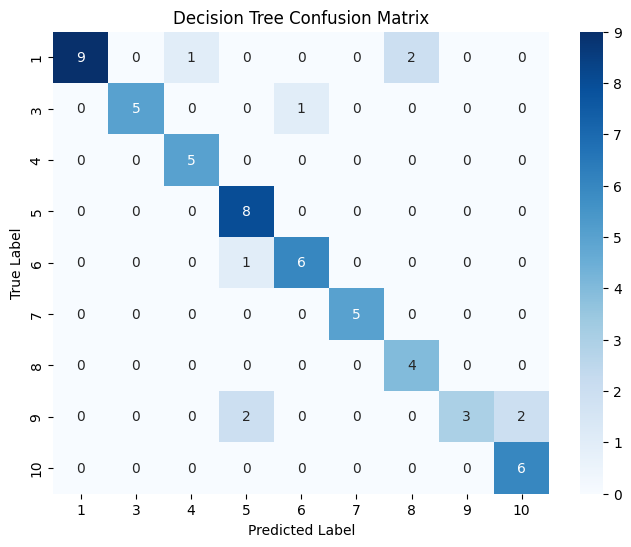

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Your data loading and preprocessing code remains the same...

# Train a Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)

# Evaluate the decision tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Accuracy: {accuracy_decision_tree}")

# Display classification report for more detailed evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))

# Generate and display the confusion matrix
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
print("Decision Tree Confusion Matrix:")
print(conf_matrix_decision_tree)

# Create a heatmap for graphical representation of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt="d", cmap="Blues", xticklabels=decision_tree_model.classes_, yticklabels=decision_tree_model.classes_)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
data=pd.read_csv('Final.csv')
# Assuming 'data' is your DataFrame
X = data[['Age', 'Gender', 'Skin Type', 'Acne', 'Aging', 'Dark spots', 'Dryness', 'Uneven']]
y = data['Product']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some algorithms like Naive Bayes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_naive_bayes = naive_bayes_model.predict(X_test_scaled)

# Evaluate the Naive Bayes model
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
print(f"Naive Bayes Accuracy: {accuracy_naive_bayes}")

# Display classification report for more detailed evaluation
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_naive_bayes))


Naive Bayes Accuracy: 0.5166666666666667
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.92      0.76        12
           3       0.15      0.33      0.21         6
           4       0.50      1.00      0.67         5
           5       0.50      0.12      0.20         8
           6       0.86      0.86      0.86         7
           7       0.83      1.00      0.91         5
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         7
          10       0.20      0.17      0.18         6

    accuracy                           0.52        60
   macro avg       0.41      0.49      0.42        60
weighted avg       0.44      0.52      0.45        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
